In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.DataFrame({
    'Name': [
        'Irma',
        'Ian',
        'Wilma',
        'Frances',
        'Jeanne',
        'Charley',
        'Ivan',
        'Michael'
    ],
    'IHP': [
        1020976908.08,
        917127545.87,
        342259581.97,
        411815685.98,
        398618731.65,
        208970753.97,
        164509853.53,
        149572302.29
    ],
    'Year': [
        '2017-09-10',
        '2022-09-29',
        '2005-10-24',
        '2004-09-04',
        '2004-09-26',
        '2004-08-13',
        '2004-09-16',
        '2018-10-11'
    ],
    'Wind speed kt': [
        100,
        125,
        105,
        90,
        105,
        130,
        105,
        140
    ],
    'Affected Counties': [
        67,
        77,
        20,
        67,
        53,
        67,
        45,
        18
    ]
}, columns=['Name', 'IHP', 'Year', 'Wind speed kt', 'Affected Counties', 'Rainfall', 'Building Code'])
data.set_index('Name', inplace=True)

In [3]:
declarations = pd.read_csv('gatorcain_data/declarations_clean_data.csv')

# Get disaster Number

In [4]:
declarations = declarations[declarations['declarationType'] == 'DR']
declarations.set_index('disasterNumber', inplace=True)
declarations['Affected Counties'] = declarations['designatedArea'].str.count(',') + 1
declarations = declarations.drop('declarationType', axis=1)
declarations

,declarationDate,declarationTitle,designatedArea,Affected Counties
disasterNumber,,,,
1539,2004-08-13 00:00:00+00:00,TROPICAL STORM BONNIE AND HURRICANE CHARLEY,"Franklin (County),Wakulla (County),Hendry (Cou...",67
1545,2004-09-04 00:00:00+00:00,HURRICANE FRANCES,"Sarasota (County),Nassau (County),Okeechobee (...",67
1551,2004-09-16 00:00:00+00:00,HURRICANE IVAN,"Jackson (County),Wakulla (County),Washington (...",45
1561,2004-09-26 00:00:00+00:00,HURRICANE JEANNE,"Marion (County),Hernando (County),Palm Beach (...",53
1595,2005-07-10 00:00:00+00:00,HURRICANE DENNIS,"Calhoun (County),Gadsden (County),Wakulla (Cou...",20
1602,2005-08-28 00:00:00+00:00,HURRICANE KATRINA,"Santa Rosa (County),Escambia (County),Miami-Da...",11
1609,2005-10-24 00:00:00+00:00,HURRICANE WILMA,"Brevard (County),Hendry (County),DeSoto (Count...",20
1806,2008-10-27 00:00:00+00:00,HURRICANE GUSTAV,"Santa Rosa (County),Gulf (County),Okaloosa (Co...",6
4084,2012-10-18 00:00:00+00:00,HURRICANE ISAAC,"Escambia (County),St. Lucie (County),Okaloosa ...",12


# Getting The number of claims per zip

In [5]:
claims_by_zip = pd.read_csv('gatorcain_data/claims_by_zipcode.csv', index_col=0)
claims_by_zip.head()

,Irma,Ian,Wilma,Frances,Jeanne,Charley,Ivan,Michael
32002,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
32003,1285.0,1.0,0.0,133.0,138.0,0.0,8.0,138.0
32004,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
32007,10.0,1.0,0.0,35.0,19.0,0.0,0.0,19.0
32008,687.0,0.0,0.0,147.0,190.0,2.0,0.0,190.0


# Claims distribution

In [6]:
fl_claims = pd.read_csv('gatorcain_data/hurricane_FL_data.csv')
fl_claims = fl_claims.drop(['incidentType', 'damagedStateAbbreviation'], axis=1)
fl_claims['county'].value_counts()

C:\Users\marre\AppData\Local\Temp\ipykernel_9692\3024469853.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  fl_claims = pd.read_csv('gatorcain_data/hurricane_FL_data.csv')


Miami-Dade (County)               800300
Broward (County)                  542878
Palm Beach (County)               452408
Orange (County)                   370044
Lee (County)                      364516
                                   ...  
Big Cypress Indian Reservation       515
Brighton Indian Reservation          462
Jefferson (County)                   164
Statewide                              7
Seminole Indian Trust Lands            2
Name: county, Length: 75, dtype: int64

In [7]:
broward_miami_claims = fl_claims[(fl_claims['county'] == 'Miami-Dade (County)') | (fl_claims['county'] == 'Broward (County)')]
broward_miami_claims = broward_miami_claims[(broward_miami_claims['disasterNumber'] != 1607) & (broward_miami_claims['ihpAmount'] > 0)]
broward_miami_claims['county'].value_counts()

Miami-Dade (County)    259263
Broward (County)       179388
Name: county, dtype: int64

# Calc IHP sum for miami & Broward for each hurricane

In [21]:
frances_claims = broward_miami_claims[broward_miami_claims['disasterNumber'] == 1545]

# calc sum for broward
broward_frances_ihp = frances_claims[frances_claims['county'] == 'Broward (County)']
# calc sum for miami
miami_frances_ihp = frances_claims[frances_claims['county'] != 'Broward (County)']

print(broward_frances_ihp['ihpAmount'].sum(), miami_frances_ihp['ihpAmount'].sum())

wilma_claims = broward_miami_claims[broward_miami_claims['disasterNumber'] == 1609]

# calc sum for broward
broward_wilma_ihp = wilma_claims[wilma_claims['county'] == 'Broward (County)']
# calc sum for miami
miami_wilma_ihp = wilma_claims[wilma_claims['county'] != 'Broward (County)']

print(broward_wilma_ihp['ihpAmount'].sum(), miami_wilma_ihp['ihpAmount'].sum())

irma_claims = broward_miami_claims[broward_miami_claims['disasterNumber'] == 4337]

# calc sum for broward
broward_irma_ihp = irma_claims[irma_claims['county'] == 'Broward (County)']
# calc sum for miami
miami_irma_ihp = irma_claims[irma_claims['county'] != 'Broward (County)']

print(broward_irma_ihp['ihpAmount'].sum(), miami_irma_ihp['ihpAmount'].sum())

14362974.16 31231560.08
118113978.73 92793167.40999998
106272310.11999999 223359605.32000005


Text(0.5, 1.0, 'Distribution of IHP Amounts for Hurricane Frances, Wilma, & Irma')

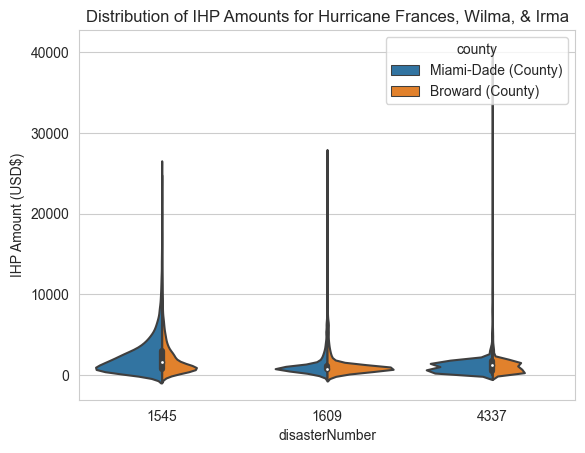

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

# Create a violin plot using seaborn
sns.violinplot(data=broward_miami_claims, x='disasterNumber',y='ihpAmount', hue='county', split=True, scale='count', bw=0.2)

# # Add axis labels and a title
plt.ylabel('IHP Amount (USD$)')
plt.title('Distribution of IHP Amounts for Hurricane Frances, Wilma, & Irma')

In [41]:
cols = ['incidentType', 'county', 'damagedStateAbbreviation', 'damagedZipCode',
        'declarationDate', 'disasterNumber', 'ihpAmount', 'damagedCity']
dtypes = {'incidentType': np.str_, 'county': np.str_, 'damagedStateAbbreviation': np.str_,
          'damagedZipCode':np.str_, 'disasterNumber': np.int32,
          'ihpAmount': np.str_, 'damagedCity': np.str_}

claims = pd.read_csv('gatorcain_data/IndividualsAndHouseholdsProgramValidRegistrations.csv',
                     usecols=cols, dtype=dtypes, parse_dates=['declarationDate'])

fl_claims = claims[(claims['incidentType'] == 'Hurricane') & (claims['damagedStateAbbreviation'] == 'FL')]
broward_miami_claims = fl_claims[(fl_claims['county'] == 'Miami-Dade (County)') | (fl_claims['county'] == 'Broward (County)')]
broward_miami_claims = broward_miami_claims.drop(columns=['incidentType', 'damagedStateAbbreviation'])
broward_miami_claims = broward_miami_claims.query("disasterNumber == 4337 or disasterNumber == 1545 or disasterNumber == 1609")
broward_miami_claims.to_csv('broward_miami_claims.csv', index=False)
